In [1]:
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读入数据
def loadData(path):
    data = loadmat(path)
    X, y, Xval, yval, Xtest, ytest = data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']
    return X, y, Xval, yval, Xtest, ytest


In [3]:
path = r'ex8data1.mat'
X, y, Xval, yval, Xtest, ytest = loadData(path)
print(X.shape, y.shape, Xval.shape, yval.shape, Xtest.shape, ytest.shape)

(12, 1) (12, 1) (21, 1) (21, 1) (21, 1) (21, 1)


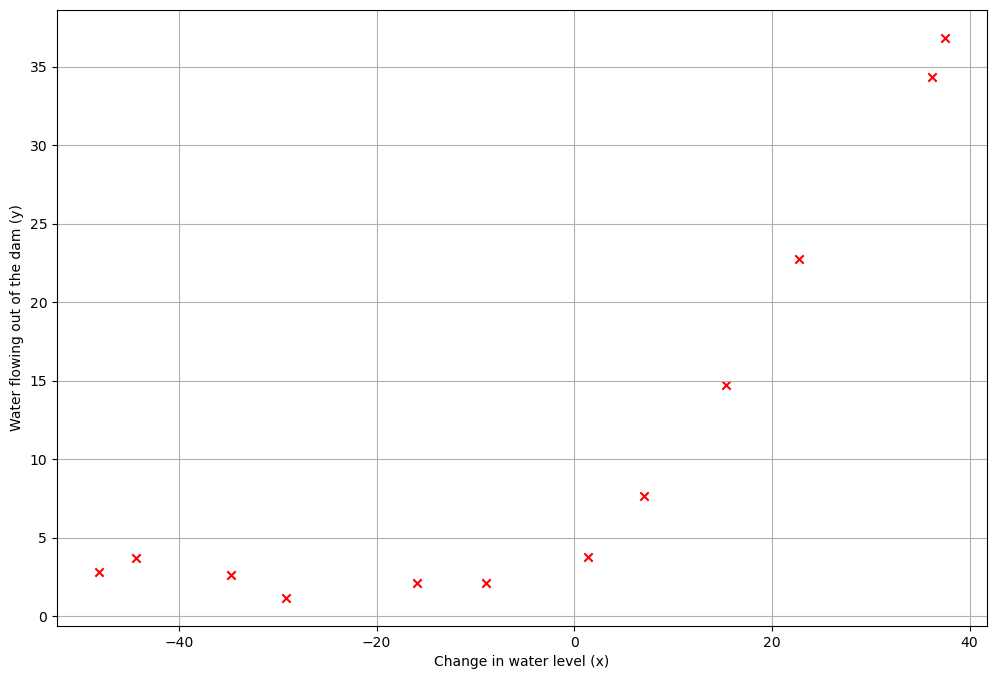

In [4]:
# 可视化
def plotData(X,y):
    plt.figure(figsize=(12,8))
    plt.scatter(X, y,c='r', marker='x')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.grid(True)
plotData(X,y)

In [5]:
# 插入x0 = 1
X, Xval, Xtest = [np.insert(x, 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]
print(X.shape, Xval.shape, Xtest.shape)
# ((12, 2), (21, 2), (21, 2))
 
# 代价函数
def linearRegCostFunc(theta, X, y, l=1):
    m = X.shape[0] # 12
    k=len(X[0])
    first=(np.matmul(X,theta.reshape(k,1))-y)**2
    second=l*(theta[1:]**2)
    print(first.shape,second.shape)
    print(np.sum(second))
    cost=np.sum(first)/(2*m)+np.sum(second)/(2*m)
    '''
    
    code here
    
    '''
    
    return cost
theta=np.ones(X.shape[1])
linearRegCostFunc(theta, X, y)

(12, 2) (21, 2) (21, 2)
(12, 1) (1,)
1.0


303.9931922202643

In [6]:
# 正则化梯度下降
def linearRegCostFuncGradient(theta, X,y, l=1):
    m = X.shape[0] # 1
    k=len(X[0])
    inner=(np.matmul(X,theta.reshape(k,1))-y)
    first=np.dot(X.T,inner)
    tmp=first/m
    regularized_term=theta.copy()
    regularized_term[0]=0
    regularized_term=(l/m)*regularized_term
    print(regularized_term)
    grad=regularized_term+tmp.T
    return grad # (2,1)

linearRegCostFuncGradient(theta,X,y)

[0.         0.08333333]


array([[-15.30301567, 598.25074417]])

In [7]:
def trainLinearRegression(X,y,lmd):
    theta=np.zeros(X.shape[1])
    rslt = opt.minimize(fun=linearRegCostFunc,x0=theta,args=(X,y,lmd),
    method='TNC',jac=linearRegCostFuncGradient)
    return rslt.x

fit_theta=trainLinearRegression(X,y,0)
fit_theta


(12, 1) (1,)
0.0
[0. 0.]
(12, 1) (1,)
0.0
[0. 0.]
(12, 1) (1,)
0.0
[0. 0.]
(12, 1) (1,)
0.0
[0. 0.]
(12, 1) (1,)
0.0
[0. 0.]
(12, 1) (1,)
0.0
[0. 0.]
(12, 1) (1,)
0.0
[0. 0.]
(12, 1) (1,)
0.0
[0. 0.]
(12, 1) (1,)
0.0
[0. 0.]


array([13.08790351,  0.36777923])

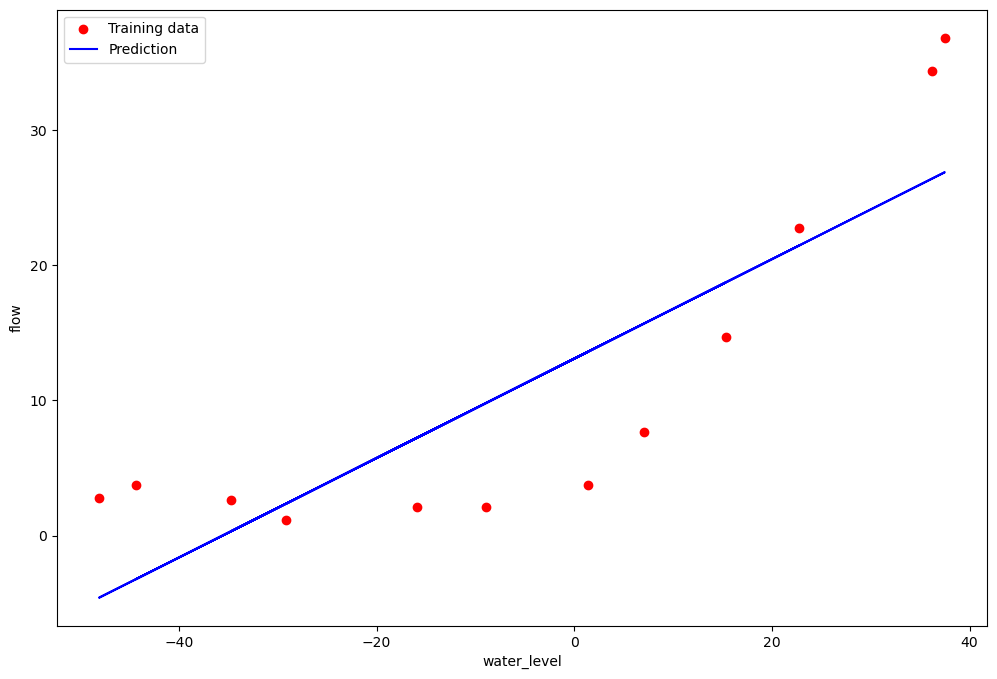

In [8]:
def plotData1(theta, X, y):
    fig,ax = plt.subplots(figsize=(12,8))
    plt.scatter(X[:,1], y, c='r', label="Training data")
    plt.plot(X[:,1], X @ theta, c = 'b', label="Prediction")
    ax.set_xlabel("water_level")
    ax.set_ylabel("flow")
    ax.legend()
    plt.show()

plotData1(fit_theta, X, y)

(1, 1) (1,)
0.0
[0. 0.]
(1, 1) (1,)
0.0
[ 0. -0.]
(1, 1) (1,)
0.0
[ 0. -0.]
(1, 1) (1,)
0.0
(21, 1) (1,)
0.01779516620222242
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[ 0. -0.]
(2, 1) (1,)
0.0
[ 0. -0.]
(2, 1) (1,)
0.0
[ 0. -0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
[0. 0.]
(2, 1) (1,)
0.0
(21, 1) (1,)
0.005287359496247208
(3, 1) (1,)
0.0
[0. 0.]
(3,

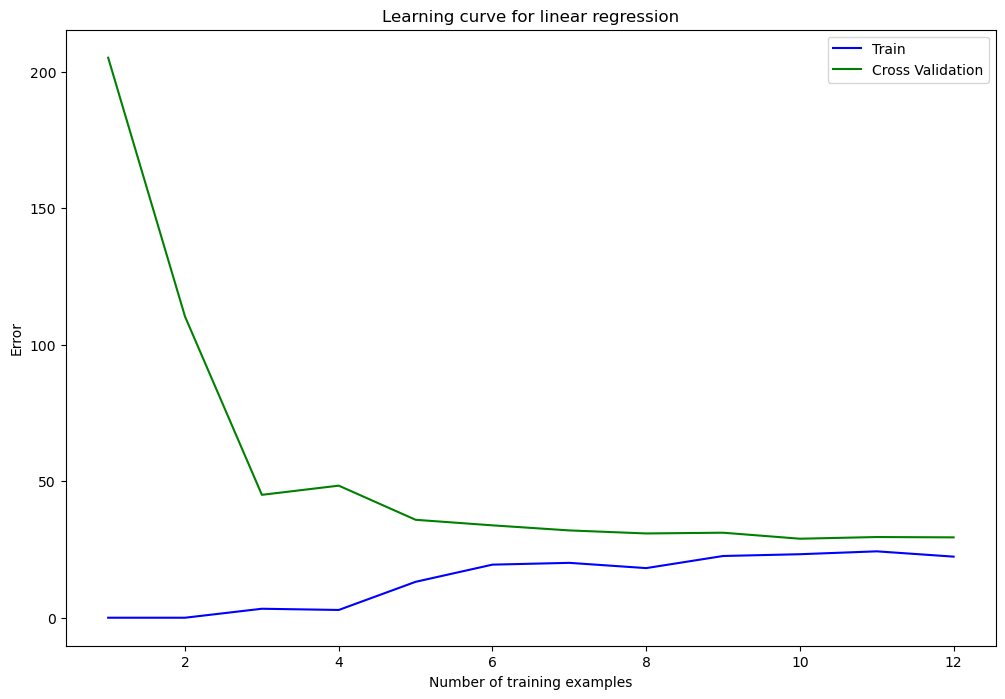

In [9]:

def plotLearningCurve(X, y, Xval, yval, l):
    """画出学习曲线"""
    size = range(1, len(X)+1)
    error_train, error_val = [], []
    for i in size:
        i_theta = trainLinearRegression(X[:i, :], y[:i], l)
        i_train_cost = linearRegCostFunc(i_theta, X[:i, :], y[:i], 0)
        i_val_cost = linearRegCostFunc(i_theta, Xval, yval)
        error_train.append(i_train_cost)
        error_val.append(i_val_cost)

    
    fix, ax = plt.subplots(figsize=(12, 8))
    ax.plot(size,error_train,label="Train",color="blue")
    ax.plot(size,error_val,label="Cross Validation",color="green")
    ax.legend()
    ax.set_xlabel("Number of training examples")
    ax.set_ylabel("Error")
    ax.set_title("Learning curve for linear regression")
    ax.grid(False)
    plt.show()

plotLearningCurve(X, y, Xval, yval, 0)

In [10]:
def polyFeatures(X, power):
    """
    多项式特征
    每次在X最后一列添加次方项
    从第三列开始插入，因为X本身含有一列x0 = 1
    """
    X2=X.copy()
    m = X.shape[0]
    for i in range(2,power+1):
        Xpoly = X2.copy()
        temp=np.power(X[:,1],i)
        temp=temp.reshape(m,1)
        
        
        X2=np.hstack((Xpoly,temp))
        
  
    
    
    return X2


In [11]:
def get_means_std(X):
    """获得训练集的均值和误差"""
    means = np.mean(X,axis = 0) # 按列
    stds = np.std(X, axis=0, ddof=1)
    
    return means, stds



def featureNormalize(X, means, stds):
    """标准化"""
    X_norm=X.copy()
    num=len(X_norm[0])
    
    for i in range(1,num):
        temp=X_norm[:,i]
        
        X_norm[:,i]=(temp-means[i])/stds[i]
        
    
    return X_norm


In [12]:
# 数据处理
power = 8
train_means, train_stds = get_means_std(polyFeatures(X, power))
X_norm = featureNormalize(polyFeatures(X, power), train_means, train_stds)
Xval_norm = featureNormalize(polyFeatures(Xval, power), train_means, train_stds)
Xtest_norm = featureNormalize(polyFeatures(Xtest, power), train_means, train_stds)

(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0. -0.  0. -0.  0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0.  0.  0. -0.  0.]
(12, 1) (8,)
0.0
[ 0.  0.  0. -0. -0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0. -0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0. -0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0. -0. -0. -0.

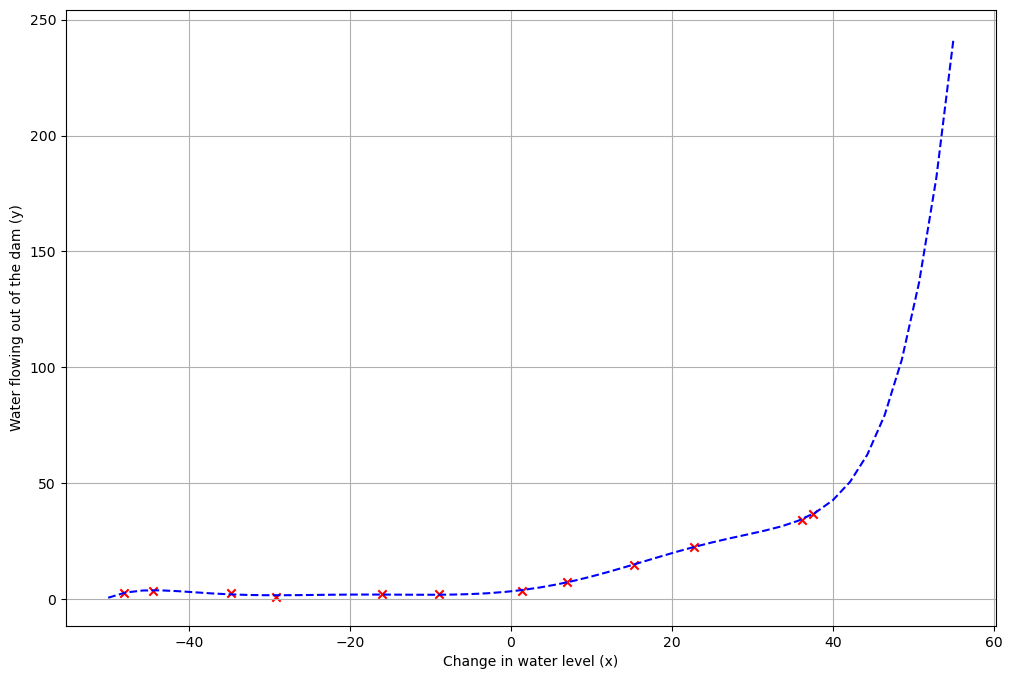

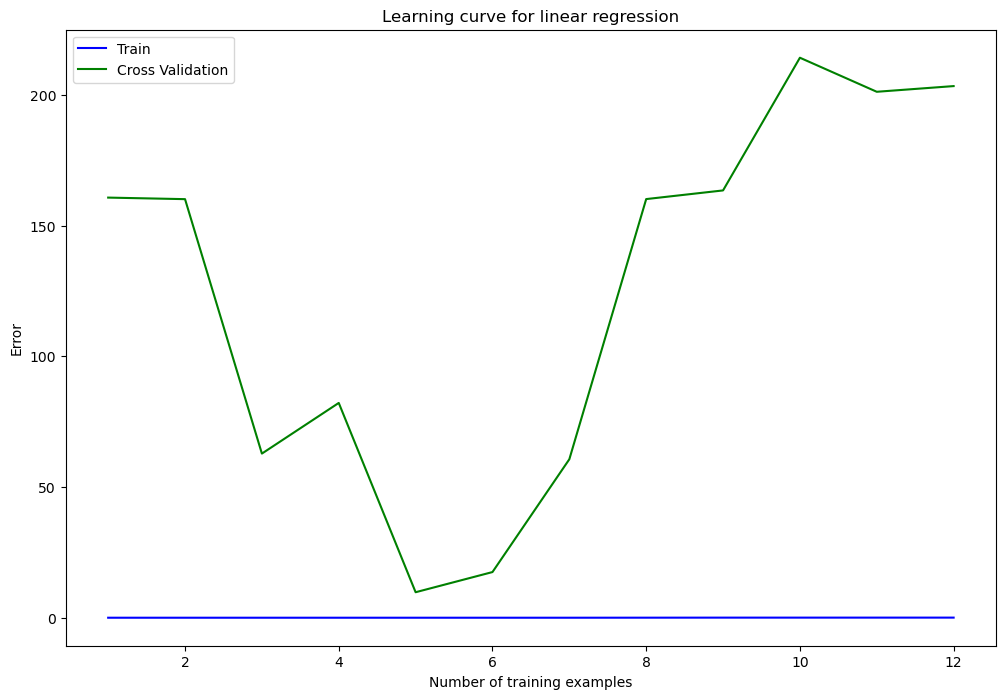

In [13]:
def plot_fit(means, stds, l):
    """画出拟合曲线"""
    theta = trainLinearRegression(X_norm,y, l)
    x = np.linspace(-50,55,50)
    xmat = x.reshape(-1, 1) # (50,)->(50,1)
    xmat = np.insert(xmat,0,1,axis=1) # 添加x0 = 1 
    Xmat = polyFeatures(xmat, power) # 增加特征
    Xmat_norm = featureNormalize(Xmat, means, stds) # 特征规范化
    plotData(X[:,1], y) # 画出原始数据
    plt.plot(x, Xmat_norm @ theta, 'b--')# 画出拟合曲线
    
plot_fit(train_means, train_stds, 0)
plotLearningCurve(X_norm, y, Xval_norm, yval, 0) # 画出学习曲线

(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
5.6397992820994536e-14
[ 0.00000000e+00  1.25442043e-08  2.20968322e-09  1.03804050e-08
 -4.11717360e-11  8.26998591e-09 -1.54106252e-09  6.69670832e-09
 -2.45866232e-09]
(12, 1) (8,)
6.24689449135244e-14
[ 0.00000000e+00  9.91024156e-09  1.12803400e-08  5.18406142e-09
  9.17593827e-09  1.68092033e-09  7.44124705e-09 -6.00827883e-10
  6.22271474e-09]
(12, 1) (8,)
6.904341120136992e-17
[ 0.00000000e+00  1.64393949e-11 -1.82961839e-10 -3.68043678e-10
 -2.82506853e-10 -3.19071831e-10 -2.35352249e-10 -1.93637165e-10
 -1.89112951e-10]
(12, 1) (8,)
46.37039140176777
[0.         0.38226238 0.22953265 0.24150684 0.14990047 0.14681632
 0.09689114 0.08692371 0.06254985]
(12, 1) (8,)
46.3703981805074
[0.         0.38226242 0.22953265 0.24150686 0.14990047 0.14681634
 0.09689114 0.08692372 0.06254984]
(12, 1) (8,)
46.37039788605371
[0.         0.38226241 0.22953268 0.24150685 0.14990049 0.14681632
 0.09689116 0.08692371 0.06254986]
(12, 1)

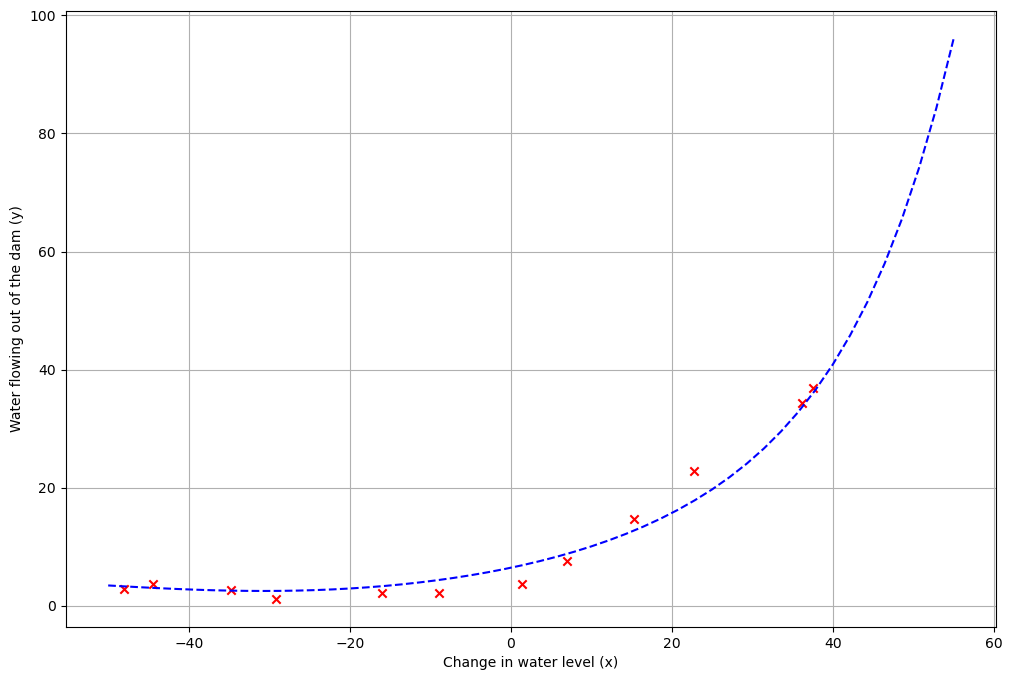

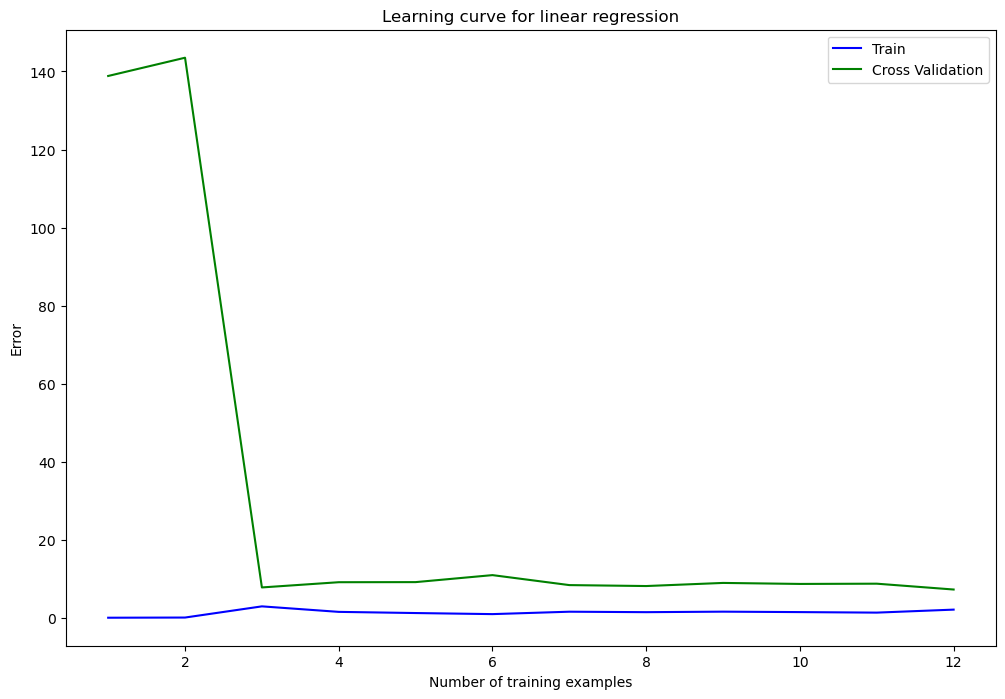

In [14]:
plot_fit(train_means, train_stds, 1)
plotLearningCurve(X_norm, y, Xval_norm, yval, 1) 

(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
5.6397992820994536e-12
[ 0.00000000e+00  1.25442043e-06  2.20968322e-07  1.03804050e-06
 -4.11717360e-09  8.26998591e-07 -1.54106252e-07  6.69670832e-07
 -2.45866232e-07]
(12, 1) (8,)
5.332461388699103e-13
[ 0.00000000e+00  1.42202889e-07  3.36948812e-07  1.89898755e-08
  3.00763076e-07 -6.49891599e-08  2.65776881e-07 -1.16806180e-07
  2.39227896e-07]
(12, 1) (8,)
1.4430875514208663e-12
[ 0.00000000e+00 -4.38424156e-07 -5.48953913e-07 -2.25143932e-07
 -4.56859414e-07 -6.01353238e-08 -3.76228253e-07  4.90705310e-08
 -3.18740972e-07]
(12, 1) (8,)
4.1992793203626637e-16
[ 0.00000000e+00 -1.13514587e-08 -1.59676441e-09  6.12057442e-09
  3.94590843e-09  7.44731969e-09  3.86806324e-09  5.07733567e-09
  3.31298992e-09]
(12, 1) (8,)
164.25900021068944
[ 0.          7.10356794  2.38026403  5.50650268  1.06265966  4.09498981
  0.14913343  3.08502387 -0.42783639]
(12, 1) (8,)
164.25901366515745
[ 0.          7.10356813  2.3802641   5.5065

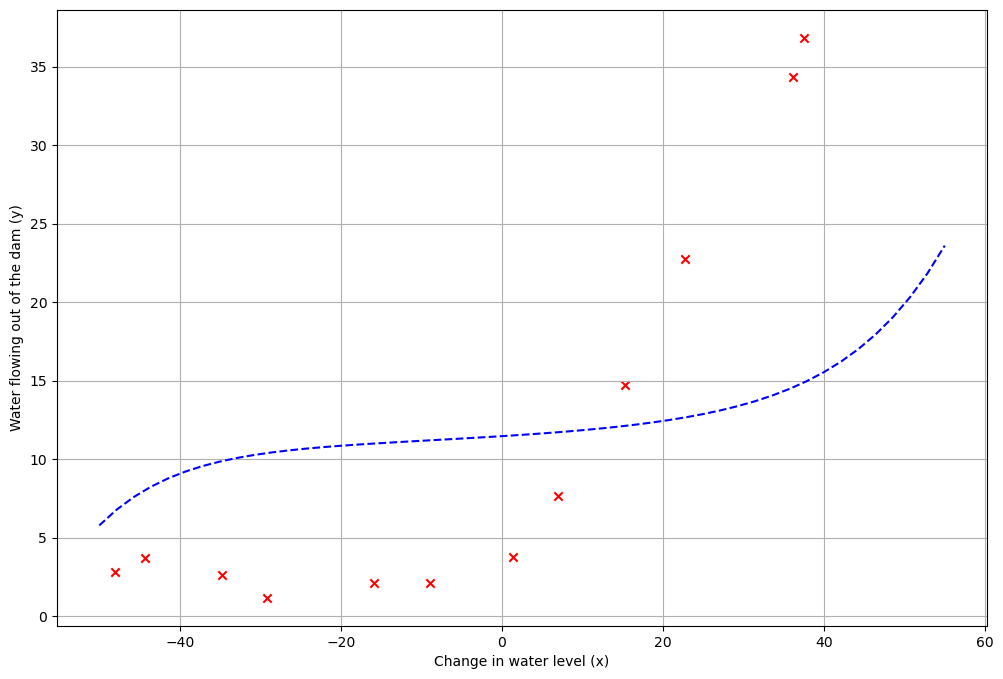

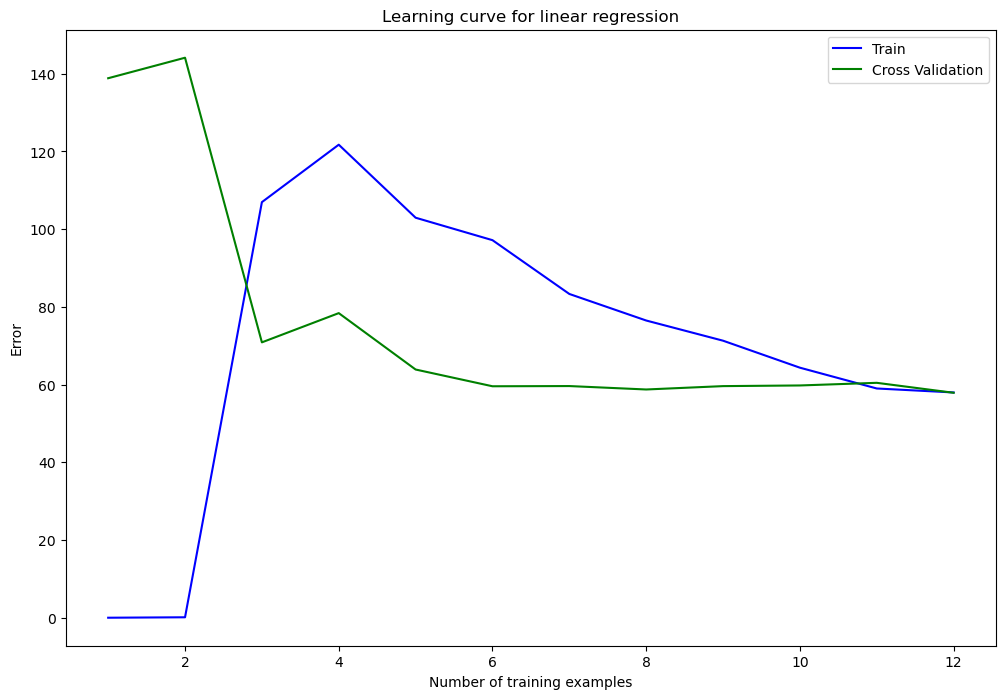

In [15]:
plot_fit(train_means, train_stds, 100)
plotLearningCurve(X_norm, y, Xval_norm, yval, 100) 

(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0. -0.  0. -0.  0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0.  0.  0. -0.  0.]
(12, 1) (8,)
0.0
[ 0.  0.  0. -0. -0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0.  0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0. -0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0. -0. -0. -0. -0. -0.]
(12, 1) (8,)
0.0
[ 0.  0.  0.  0. -0. -0. -0.

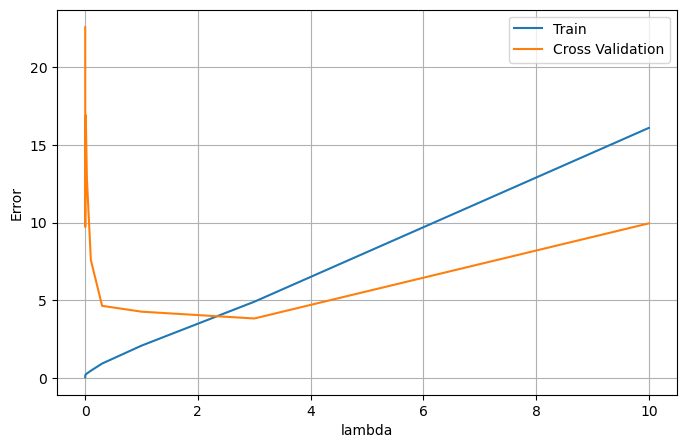

In [16]:
lambdas = [0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]
errors_train, errors_val = [], []
for l in lambdas:
    theta = trainLinearRegression(X_norm, y, l)
    errors_train.append(linearRegCostFunc(theta,X_norm,y,0))  # 记得把lambda = 0
    errors_val.append(linearRegCostFunc(theta,Xval_norm,yval,0))
    
plt.figure(figsize=(8,5))
plt.plot(lambdas,errors_train,label='Train')
plt.plot(lambdas,errors_val,label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid(True)

In [17]:
theta = trainLinearRegression(X_norm, y, 3)
print('test cost(l={}) = {}'.format(3, linearRegCostFunc(theta, Xtest_norm, ytest, 0)))
##前面的结果一切正常，但最后的误差为3.85

(12, 1) (8,)
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12, 1) (8,)
1.6919397846298361e-13
[ 0.00000000e+00  3.76326130e-08  6.62904966e-09  3.11412149e-08
 -1.23515208e-10  2.48099577e-08 -4.62318755e-09  2.00901250e-08
 -7.37598696e-09]
(12, 1) (8,)
1.6896824952839294e-13
[ 0.00000000e+00  2.75944785e-08  3.23235128e-08  1.41455004e-08
  2.64326618e-08  4.21521039e-09  2.15498142e-08 -2.23777251e-09
  1.81095619e-08]
(12, 1) (8,)
7.052117666193365e-16
[ 0.00000000e+00 -1.30773223e-09 -1.54752795e-09 -1.86215377e-09
 -1.54755008e-09 -1.34518565e-09 -1.21089499e-09 -7.46264799e-10
 -9.44285618e-10]
(12, 1) (8,)
121.19709010447127
[0.         1.06496066 0.62944666 0.69101274 0.41144941 0.42859545
 0.26303657 0.25917255 0.16659271]
(12, 1) (8,)
121.19710632128846
[0.         1.06496075 0.62944668 0.6910128  0.41144941 0.4285955
 0.26303656 0.25917259 0.16659269]
(12, 1) (8,)
121.19710339265066
[0.         1.06496071 0.62944673 0.69101275 0.41144946 0.42859545
 0.26303661 0.25917254 0.16659275]
(1